In [41]:
import torch 
import matplotlib.pyplot as plt
import torch.nn.functional as F

torch.Size([1, 6, 6])


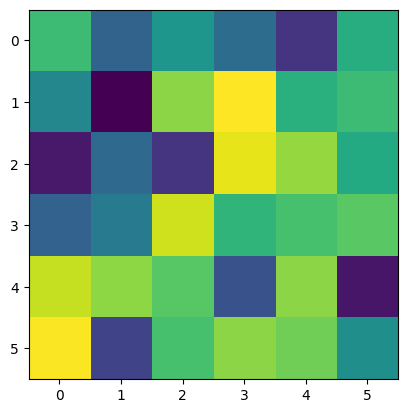

In [42]:
image = torch.rand(6,6)
plt.imshow(image)
image = image.unsqueeze(dim=0)
print(image.shape)

In [46]:
kernel = torch.ones(5,5).unsqueeze(dim = 0).unsqueeze(dim = 0)
outimage = F.conv2d(image, kernel,stride = 1, padding = 0)
print(outimage.shape)
outimage = F.conv2d(image, kernel,stride = 2, padding = 0)
print(outimage.shape)
outimage = F.conv2d(image, kernel,stride = 3, padding = 0)
print(outimage.shape)
outimage = F.conv2d(image, kernel,stride = 1, padding = 1)
print(outimage.shape)
outimage = F.conv2d(image, kernel,stride = 1, padding = 2)
print(outimage.shape)
outimage = F.conv2d(image, kernel,stride = 1, padding = 3)
print(outimage.shape)

torch.Size([1, 2, 2])
torch.Size([1, 1, 1])
torch.Size([1, 1, 1])
torch.Size([1, 4, 4])
torch.Size([1, 6, 6])
torch.Size([1, 8, 8])


In [47]:
kernels = torch.ones(3,1,3,3)

In [48]:
print(kernels)


tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],


        [[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],


        [[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])


In [49]:
def outputSize(imageDim, kernelDim, stride, padding):
    return(imageDim-kernelDim + 2*padding)/stride + 1

In [50]:
con = torch.nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = (3,3), stride = 1, padding = 0)
output = con(image)
print(output.shape)
outimage = F.conv2d(image,kernels)
print(outimage.shape)


torch.Size([3, 4, 4])
torch.Size([3, 4, 4])


In [51]:
#Q3 and 4

In [52]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import torchvision
import torchvision.transforms as transforms

In [53]:
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [55]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,128,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(64,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))


In [56]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())


In [57]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [58]:
model = CNN().to(device)

In [59]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [60]:
def trainModel(model, num_epochs,train_loader,optimizer):
    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # origin shape: [100, 1, 28, 28]
            # resized: [100, 784]
            # images = images.reshape(-1, 28*28).to(device)
            images = images.to(device)
            labels = labels.to(device)
    
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
    
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


In [61]:
trainModel(model,1, train_loader, optimizer)


Epoch [1/1], Step [100/600], Loss: 0.3406
Epoch [1/1], Step [200/600], Loss: 0.1705
Epoch [1/1], Step [300/600], Loss: 0.2106
Epoch [1/1], Step [400/600], Loss: 0.1619
Epoch [1/1], Step [500/600], Loss: 0.0554
Epoch [1/1], Step [600/600], Loss: 0.0729


In [62]:
class CNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(32,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(32,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))



In [63]:
class CNN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,16,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(16,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(32,16,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(16,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))


In [64]:
class CNN4(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,64,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,128,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,256,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(256,128,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,64,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(64,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))

In [65]:
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as cdm
def test(model, test_loader):
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  
    return correct/total



In [66]:
m1 = CNN().to(device)
m2 = CNN2().to(device)
m3 = CNN3().to(device)
m4 = CNN4().to(device)

o1 = torch.optim.Adam(m1.parameters(), lr=learning_rate)
o2 = torch.optim.Adam(m2.parameters(), lr=learning_rate)
o3 = torch.optim.Adam(m3.parameters(), lr=learning_rate)
o4 = torch.optim.Adam(m4.parameters(), lr=learning_rate)

#trainModel(m1,2, train_loader, o1)
trainModel(m2,2, train_loader, o2)
trainModel(m3,2, train_loader, o3)
trainModel(m4,2, train_loader, o4)



Epoch [1/2], Step [100/600], Loss: 0.4666
Epoch [1/2], Step [200/600], Loss: 0.2498
Epoch [1/2], Step [300/600], Loss: 0.2589
Epoch [1/2], Step [400/600], Loss: 0.3273
Epoch [1/2], Step [500/600], Loss: 0.1692
Epoch [1/2], Step [600/600], Loss: 0.1561
Epoch [2/2], Step [100/600], Loss: 0.1699
Epoch [2/2], Step [200/600], Loss: 0.0715
Epoch [2/2], Step [300/600], Loss: 0.1041
Epoch [2/2], Step [400/600], Loss: 0.1823
Epoch [2/2], Step [500/600], Loss: 0.0755
Epoch [2/2], Step [600/600], Loss: 0.0926
Epoch [1/2], Step [100/600], Loss: 0.9234
Epoch [1/2], Step [200/600], Loss: 0.6256
Epoch [1/2], Step [300/600], Loss: 0.3644
Epoch [1/2], Step [400/600], Loss: 0.2996
Epoch [1/2], Step [500/600], Loss: 0.4002
Epoch [1/2], Step [600/600], Loss: 0.1730
Epoch [2/2], Step [100/600], Loss: 0.2739
Epoch [2/2], Step [200/600], Loss: 0.2168
Epoch [2/2], Step [300/600], Loss: 0.2862
Epoch [2/2], Step [400/600], Loss: 0.2563
Epoch [2/2], Step [500/600], Loss: 0.1667
Epoch [2/2], Step [600/600], Loss:

In [67]:
m2a = test(m2,test_loader)
m3a = test(m3,test_loader)
m4a = test(m4,test_loader)
m1a = test(model,test_loader)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

m2p = count_parameters(m2)
m3p = count_parameters(m3)
m4p = count_parameters(m4)
m1p = count_parameters(model)

import numpy as np
x = [m1p,m1p-m2p,m1p-m3p,m4p-m1p]

x = np.array(x)

x / m1p * 100



array([100.        ,  74.53237026,  93.34170016, 394.00259015])

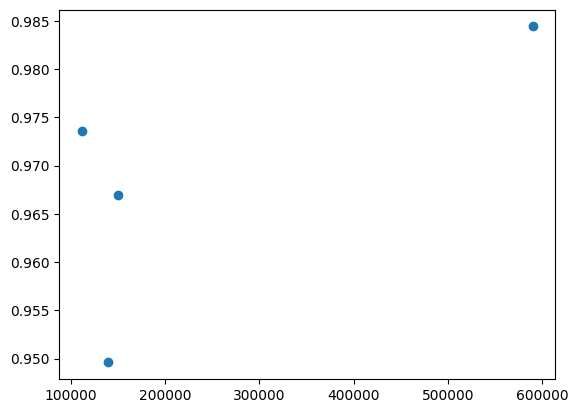

In [68]:
y = np.array([m1a, m2a, m3a, m4a])
plt.scatter(x,y)



In [69]:
y

array([0.9669, 0.9736, 0.9496, 0.9844])

In [ ]:
x